In [1]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

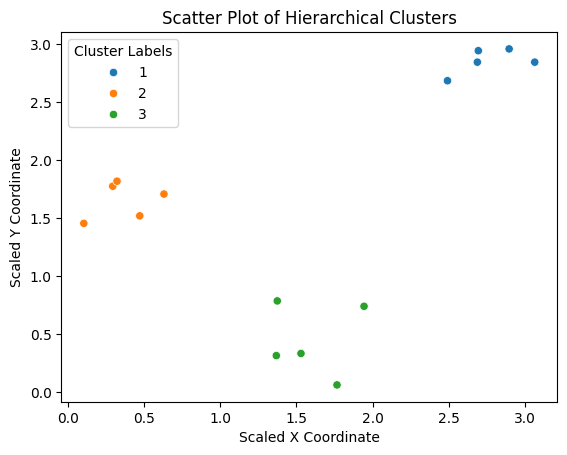

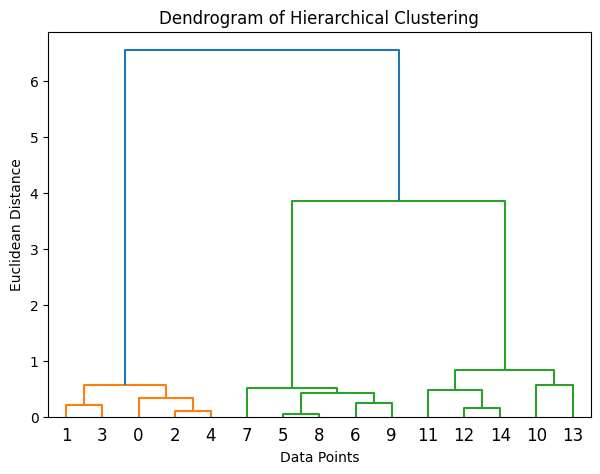

In [2]:
# ================= Hierarchical Clustering with Visualization =================
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.vq import whiten

# Input data: coordinates for clustering
x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

# Scale the coordinates using the whiten method for normalization
x_scaled_coordinates = whiten(x_coordinates)
y_scaled_coordinates = whiten(y_coordinates)

# Create a DataFrame to hold the scaled coordinates
df = pd.DataFrame({
    'x_coordinate': x_scaled_coordinates,
    'y_coordinate': y_scaled_coordinates
})

# Perform hierarchical clustering using Ward's method with Euclidean distance
Z = linkage(df, method='ward', metric='euclidean')

# Assign cluster labels to data points (3 clusters in this case)
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')

# Plot scatter plot with cluster labels
sns.scatterplot(
    x='x_coordinate',
    y='y_coordinate',
    hue='cluster_labels',
    palette='tab10',
    data=df
)
plt.title("Scatter Plot of Hierarchical Clusters")
plt.xlabel("Scaled X Coordinate")
plt.ylabel("Scaled Y Coordinate")
plt.legend(title="Cluster Labels")
plt.show()

# Plot the dendrogram to visualize hierarchical clustering
plt.figure(figsize=(7, 5))
dendrogram(Z)
plt.title("Dendrogram of Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

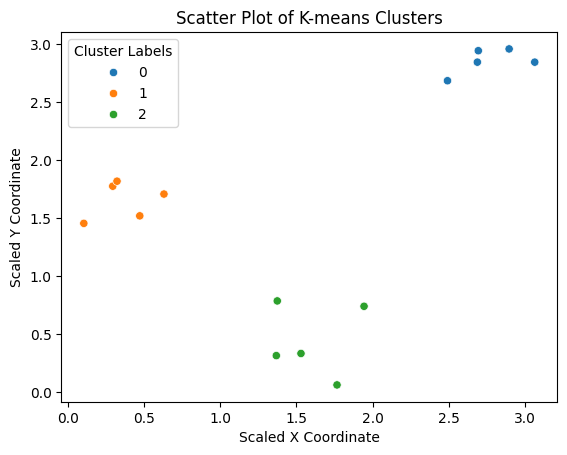

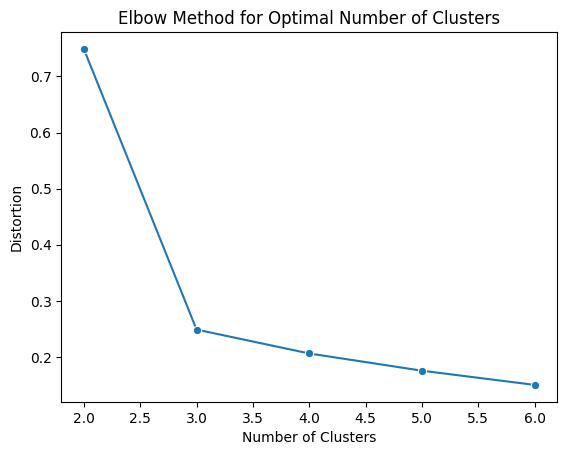

Cluster Sizes:

                Count
Cluster Labels       
0                   5
1                   5
2                   5
Cluster Centers (Mean of Features for Each Cluster):

              x_coordinate  y_coordinate
Class Labels                            
0                 2.765071      2.855447
1                 0.365609      1.656492
2                 1.596118      0.449531


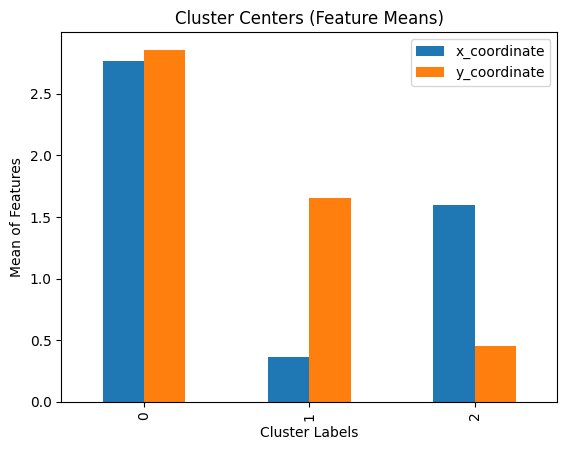

In [3]:
# ================= K-means Clustering and Elbow Method =================
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import random

from scipy.cluster.vq import kmeans, vq, whiten

# Set random seed for reproducibility
random.seed(10)

# Input data: coordinates for clustering
x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

# Scale the coordinates using the whiten method for normalization
x_scaled_coordinates = whiten(x_coordinates)
y_scaled_coordinates = whiten(y_coordinates)

# Create a DataFrame to hold the scaled coordinates
df = pd.DataFrame({
    'x_coordinate': x_scaled_coordinates,
    'y_coordinate': y_scaled_coordinates
})

# ================= Perform K-means Clustering =================
# Cluster the data into 3 clusters
centroids, _ = kmeans(df, 3)
df['cluster_labels'], _ = vq(df, centroids)

# Plot scatter plot of the clusters
sns.scatterplot(
    x='x_coordinate',
    y='y_coordinate',
    hue='cluster_labels',
    palette='tab10',
    data=df
)
plt.title("Scatter Plot of K-means Clusters")
plt.xlabel("Scaled X Coordinate")
plt.ylabel("Scaled Y Coordinate")
plt.legend(title="Cluster Labels")
plt.show()

# ================= Elbow Method for Optimal Clusters =================
# Compute distortions for a range of cluster numbers
distortions = []
num_clusters = range(2, 7)

for i in num_clusters:
    centroids, distortion = kmeans(df, i)
    distortions.append(distortion)

# Create a DataFrame for the Elbow plot
elbow_plot_data = pd.DataFrame({
    'num_clusters': num_clusters,
    'distortions': distortions
})

# Plot the Elbow curve
sns.lineplot(
    x='num_clusters',
    y='distortions',
    marker='o',
    data=elbow_plot_data
)
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.show()

# ================= Size of Clusters =================
# Group by cluster labels and count the number of points in each cluster
cluster_sizes = df.groupby('cluster_labels').size().reset_index(name='Count')

# Rename the index name
cluster_sizes.rename(columns={'cluster_labels': 'Cluster Labels'}, inplace=True)

# Set 'Cluster Labels' as the index
cluster_sizes.set_index('Cluster Labels', inplace=True)

# Print the sizes of the clusters
print("="*30)
print("Cluster Sizes:", end="\n\n")
print(cluster_sizes)
print("="*30)

# ================= Cluster Centers and Visualization =================
# Calculate the mean of each feature for each cluster
cluster_centers = df.groupby('cluster_labels').mean()

# Rename the index column to 'Class Labels'
cluster_centers.rename_axis('Class Labels', inplace=True)

# Print the cluster centers
print("="*70)
print("Cluster Centers (Mean of Features for Each Cluster):", end="\n\n")
print(cluster_centers)
print("="*70)

# Visualize the cluster centers as a bar chart
cluster_centers.plot(kind='bar', legend=True)
plt.title("Cluster Centers (Feature Means)")
plt.xlabel("Cluster Labels")
plt.ylabel("Mean of Features")
plt.show()

Image shape: (405, 608, 3)



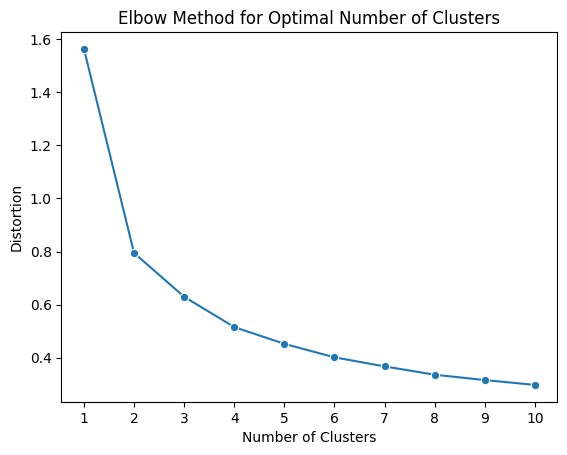

Dominant Colors (in scaled RGB format):

[(0.29500553142441305, 0.4392512623612145, 0.5232093548562826), (0.06243133901532879, 0.2246960730439572, 0.3098234787743717), (0.5294034413591707, 0.6651554095378999, 0.7844825895643377), (0.8429207188340735, 0.8364132329805896, 0.8404973933801742)]



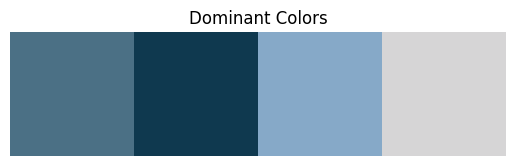

In [4]:
# ================= Dominant Colors in Images via K-means Clustering =================
import matplotlib.image as img
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.cluster.vq import kmeans, whiten

# Load the image
image = img.imread('sea.jpg')  # Replace 'sea.jpg' with your image file path
print(f"Image shape: {image.shape}", end="\n\n")  # Check image dimensions (height, width, channels)

# Store RGB values of all pixels in lists r, g and b
r, g, b = [], [], []
for row in image:
    for pixel in row:
        # A pixel contains RGB values
        temp_r, temp_g, temp_b = pixel[:3]  # Ensure we only extract the first 3 channels
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

# Create a DataFrame for the pixel data
pixels = pd.DataFrame({'red': r, 'green': g, 'blue': b})

# Scale the pixel values to standardize data
pixels['scaled_red'] = whiten(pixels['red'])
pixels['scaled_green'] = whiten(pixels['green'])
pixels['scaled_blue'] = whiten(pixels['blue'])

# ================= Elbow Method for Optimal Clusters =================
distortions = []
num_clusters = range(1, 11)

# Compute distortions for a range of cluster numbers
for i in num_clusters:
    cluster_centers, distortion = kmeans(pixels[['scaled_red', 'scaled_green', 'scaled_blue']], i)
    distortions.append(distortion)

# Create a DataFrame for the Elbow plot
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Plot the Elbow curve
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.xticks(num_clusters)
plt.show()

# ================= Dominant Colors Identification =================
# Perform K-means clustering with the chosen number of clusters (e.g., 2)
optimal_clusters = 4  # Replace with your chosen value based on the Elbow plot
cluster_centers, _ = kmeans(pixels[['scaled_red', 'scaled_green', 'scaled_blue']], optimal_clusters)

# Convert each standardized value to scaled value between 0 and 1
colors = []
r_std, g_std, b_std = pixels[['red', 'green', 'blue']].std()  # Get standard deviations of each color
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
        scaled_r * r_std / 255.0,
        scaled_g * g_std / 255.0,
        scaled_b * b_std / 255.0
    ))

# Display the dominant colors
print("Dominant Colors (in scaled RGB format):\n")
print(colors, end="\n\n")
plt.imshow([colors])
plt.title("Dominant Colors")
plt.axis("off")
plt.show()

In [5]:
# ================= Text Clustering with TF-IDF and K-means =================
import pandas as pd

import re
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy.cluster.vq import kmeans

# ================= Function to Remove Noise from Text =================
def remove_noise(text: str, stop_words: list = []) -> list:
    """
    Preprocess text by removing noise (non-alphanumeric characters, stopwords, and short tokens).

    Args:
        text (str): Input text to preprocess.
        stop_words (list): List of stopwords to exclude from the text.

    Returns:
        list: List of cleaned, lowercase tokens.
    """
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        # Remove non-alphanumeric characters
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Add cleaned and lowercase token
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

# Example usage of the remove_noise function
sample_text = "It is lovely weather we are having. I hope the weather continues."
stop_words = ["it", "is", "we", "are", "the", "i"]
print("Cleaned Tokens:", remove_noise(sample_text, stop_words=stop_words), end="\n\n")

# ================= TF-IDF Vectorization =================
# Replace 'data' with your list of text documents
data = [
    "The sky is blue and beautiful.",
    "Love this blue and beautiful sky!",
    "The quick brown fox jumps over the lazy dog.",
    "A king's breakfast has sausages, ham, bacon, eggs, toast, and beans",
    "I love green eggs, ham, sausages, and bacon!",
    "The brown fox is quick and the blue dog is lazy!",
    "The sky is very blue and the sky is very beautiful today."
]

# Initialize the TF-IDF Vectorizer with the custom tokenizer
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8,
    max_features=50,
    min_df=0.2,
    tokenizer=lambda text: remove_noise(text, stop_words=stop_words)
)

# Fit and transform the text data to compute the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
print("TF-IDF Matrix Shape:", tfidf_matrix.shape, end="\n\n")

# ================= K-means Clustering =================
# Number of clusters
num_clusters = 3

# Perform K-means clustering
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# ================= Extract and Display Top Terms per Cluster =================
# Get feature names from the vectorizer
terms = tfidf_vectorizer.get_feature_names_out()

# Display top 3 terms per cluster
for i in range(num_clusters):
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(f"Cluster {i+1} Top Terms:", sorted_terms[:3], end="\n\n")

Cleaned Tokens: ['lovely', 'weather', 'having', 'hope', 'weather', 'continues']

TF-IDF Matrix Shape: (7, 13)

Cluster 1 Top Terms: ['brown', 'dog', 'fox']

Cluster 2 Top Terms: ['bacon', 'eggs', 'ham']

Cluster 3 Top Terms: ['sky', 'beautiful', 'blue']



/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
